In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [50]:

df = pd.read_excel("Career Dataset.xlsx")

df.head()


,Career,Skill
0,Software Development and Engineering,"Web Development, Mobile App Development, Artif..."
1,Development,"Web Development, Mobile App Development, Probl..."
2,Data Science,"Data Analysis and Visualization, Deeplearning,..."
3,Development,Web Development
4,Artificial Intelligence,"Deep Learning, Machine Learning, Statistics, D..."


In [9]:
df = df[['Career', 'Skill']]


In [10]:
print(df.isnull().sum())

df.dropna(inplace=True)


Career    0
Skill     0
dtype: int64


In [11]:
print("Duplicates:", df.duplicated().sum())

df.drop_duplicates(inplace=True)


Duplicates: 1900


In [51]:
df['Skill_Length'] = df['Skill'].apply(len)


In [53]:
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['Skill'])
tfidf_matrix.shape


(4076, 1345)

In [55]:
cosine_sim_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)
cos_sim = cosine_similarity(X_tfidf)

print("Cosine Similarity Matrix Shape:", cos_sim.shape)

Cosine Similarity Matrix Shape: (2176, 2176)


In [91]:
def recommend_career(skill_input, top_n=5):
    input_vec = vectorizer.transform([skill_input])
    similarity_scores = cosine_similarity(input_vec, tfidf_matrix).flatten()
    
    top_indices = similarity_scores.argsort()[-top_n:][::-1]
    return df.iloc[top_indices][['Career', 'Skill']]

# Example
recommend_career(
    "Python, machine learning, data analysis"
)



,Career,Skill
1535,Data Science,"Deep Learning, Machine Learning, Data Engineer..."
3133,Data Science,"Deep Learning, Machine Learning, Data Engineer..."
3256,Data Science,"Deep Learning, Machine Learning, Data Engineer..."
2007,Data Science,"Deep Learning, Machine Learning, data engineer..."
3963,Artificial Intelligence,"Machine Learning, data engineering, statistica..."


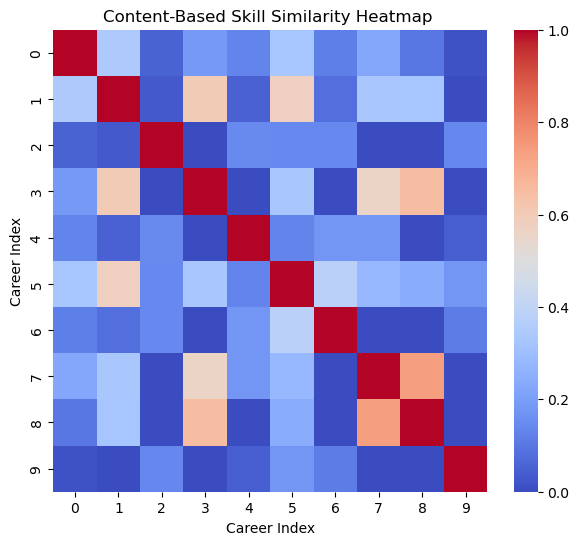

In [89]:

sample_size = 10
plt.figure(figsize=(7, 6))
sns.heatmap(
    cosine_sim_matrix[:sample_size, :sample_size],
    cmap="coolwarm"
)
plt.title("Content-Based Skill Similarity Heatmap ")
plt.xlabel("Career Index")
plt.ylabel("Career Index")
plt.show()


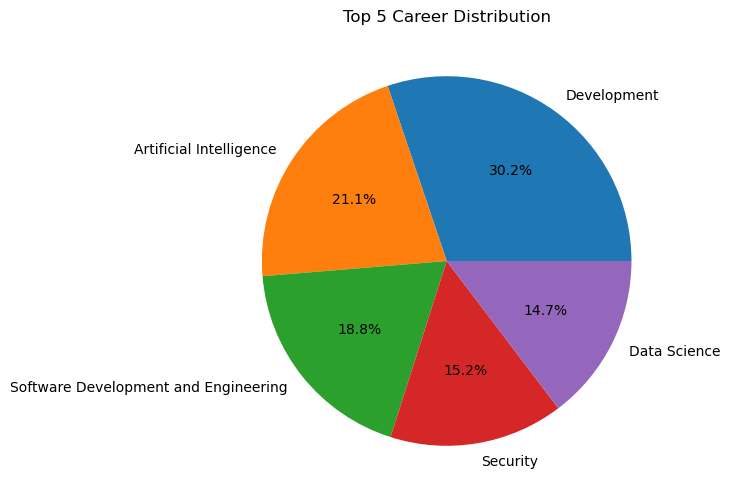

In [67]:
career_counts = df['Career'].value_counts().head(5)

plt.figure(figsize=(6, 6))
career_counts.plot.pie(autopct='%1.1f%%')
plt.title("Top 5 Career Distribution")
plt.ylabel("")
plt.show()


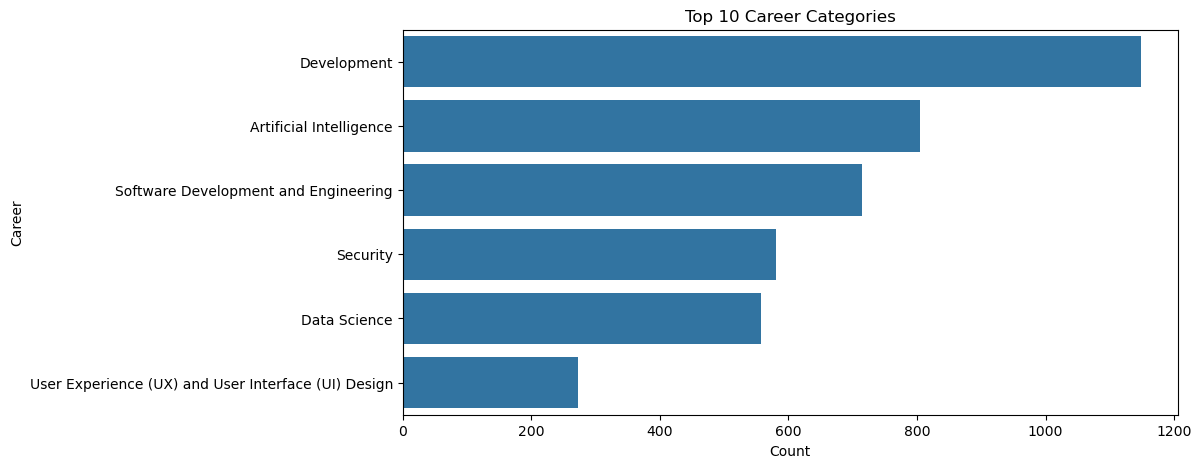

In [69]:
plt.figure(figsize=(10, 5))
sns.countplot(
    y=df['Career'],
    order=df['Career'].value_counts().head(10).index
)
plt.title("Top 10 Career Categories")
plt.xlabel("Count")
plt.ylabel("Career")
plt.show()


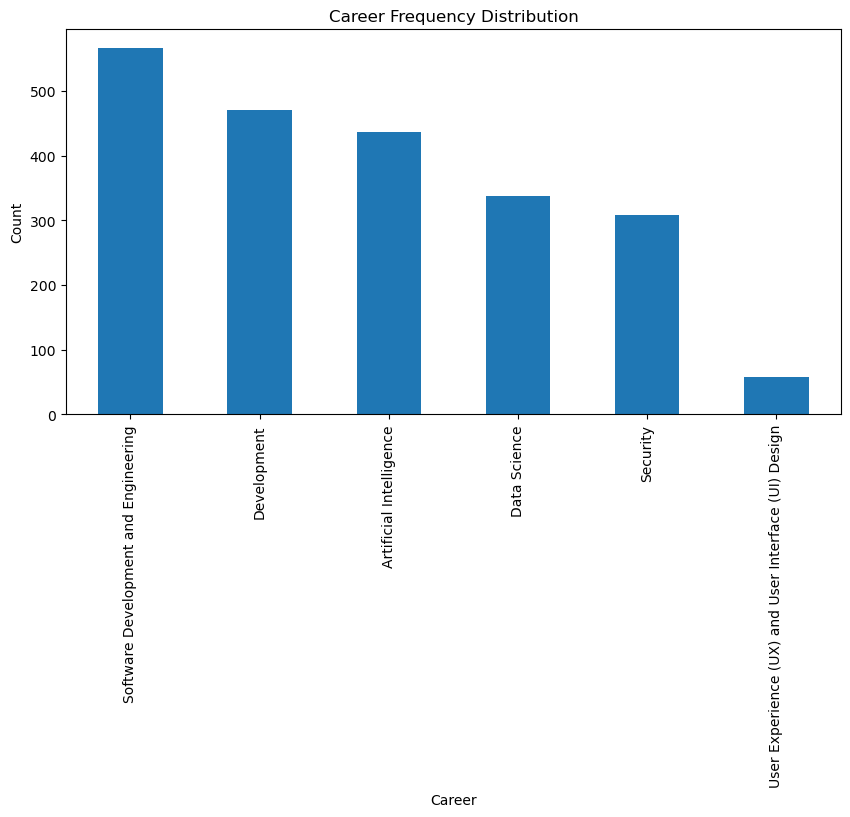

In [29]:
df['Career'].value_counts().head(10).plot(kind='bar', figsize=(10, 5))
plt.title("Career Frequency Distribution")
plt.xlabel("Career")
plt.ylabel("Count")
plt.show()


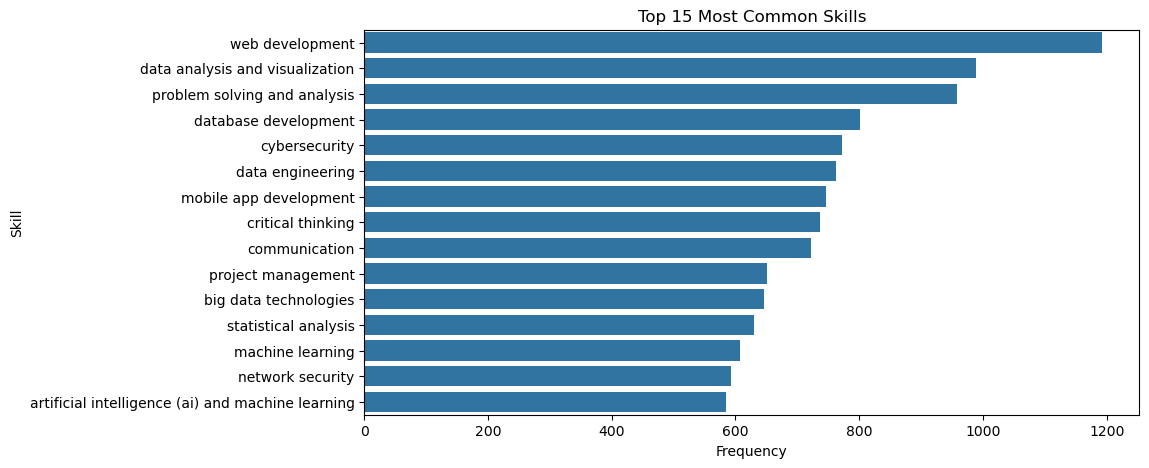

In [79]:
from collections import Counter

all_skills = df['Skill'].str.lower().str.split(',')
flat_skills = [skill.strip() for sublist in all_skills for skill in sublist]

skill_freq = Counter(flat_skills)
top_skills = skill_freq.most_common(15)

skills, counts = zip(*top_skills)

plt.figure(figsize=(10, 5))
sns.barplot(x=counts, y=skills)
plt.title("Top 15 Most Common Skills")
plt.xlabel("Frequency")
plt.ylabel("Skill")
plt.show()


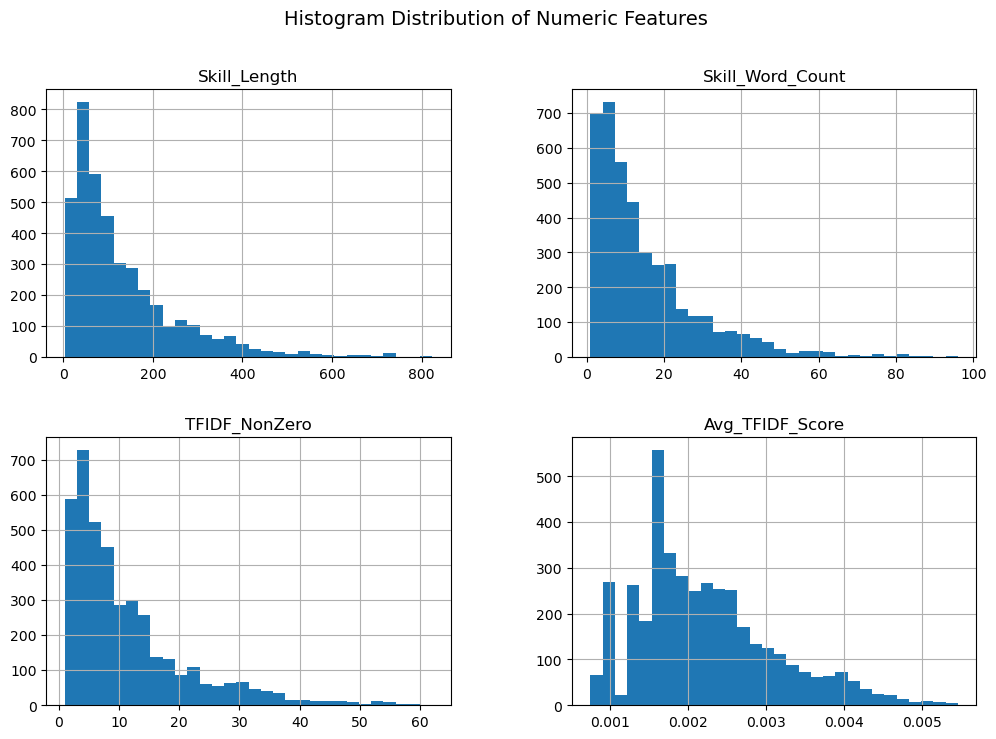

In [96]:
tfidf_dense = tfidf_matrix.toarray()
df['TFIDF_NonZero'] = (tfidf_dense > 0).sum(axis=1)
df['Avg_TFIDF_Score'] = tfidf_dense.mean(axis=1)

numeric_features = [
    'Skill_Length',
    'Skill_Word_Count',
    'TFIDF_NonZero',
    'Avg_TFIDF_Score'
]

df[numeric_features].hist(
    bins=30,
    figsize=(12, 8)
)

plt.suptitle("Histogram Distribution of Numeric Features", fontsize=14)
plt.show()

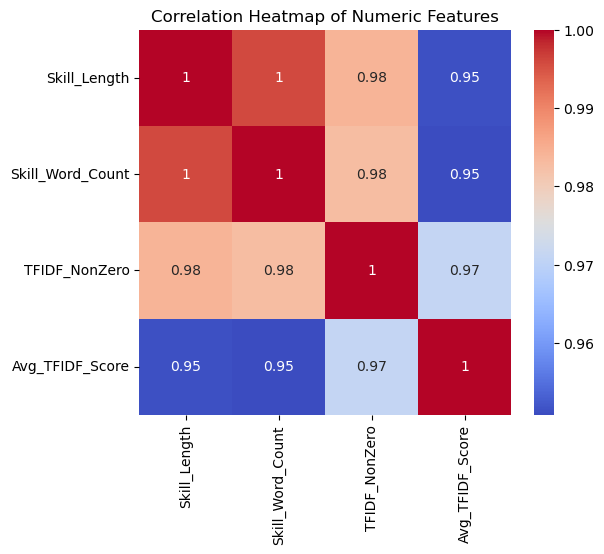

In [92]:
numeric_features = [
    'Skill_Length',
    'Skill_Word_Count',
    'TFIDF_NonZero',
    'Avg_TFIDF_Score'
]

plt.figure(figsize=(6, 5))
sns.heatmap(
    df[numeric_features].corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


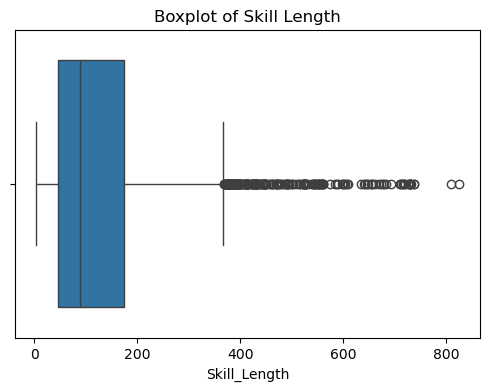

In [87]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Skill_Length'])
plt.title("Boxplot of Skill Length")
plt.show()

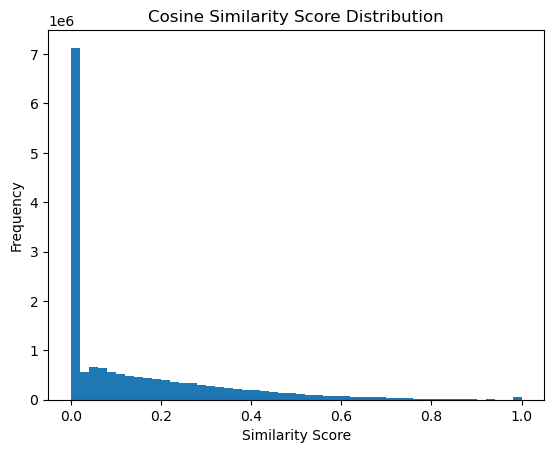

In [88]:
plt.figure()
plt.hist(cosine_sim_matrix.flatten(), bins=50)
plt.title("Cosine Similarity Score Distribution")
plt.xlabel("Similarity Score")
plt.ylabel("Frequency")
plt.show()
